This notebook contains datailed implementations of linear regression and the use of robust estimators to reduce impact of outliers. Futhermore it explores various methods of data pre-processing

polyfit slope, intercept: -3.5572727272727285 3.9167272727272775
sklearn slope, intercept: -3.557272727272728 3.916727272727277


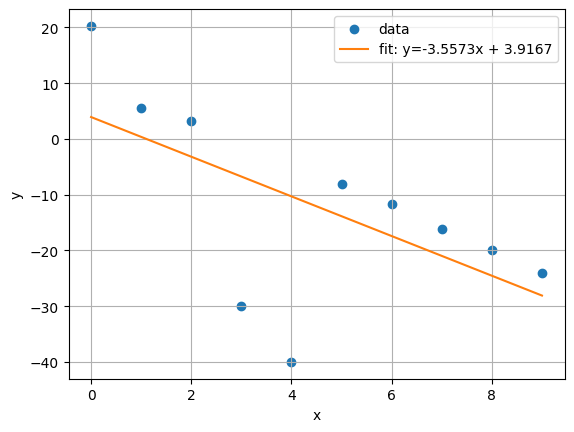

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03])

# Option A: numpy polyfit
slope, intercept = np.polyfit(x.ravel(), y, 1)
print("polyfit slope, intercept:", slope, intercept)

# Option B: sklearn
lr = LinearRegression().fit(x, y)
print("sklearn slope, intercept:", lr.coef_[0], lr.intercept_)

# Plot
xx = np.linspace(0,9,100)
yy = slope*xx + intercept
plt.scatter(x, y, label='data')
plt.plot(xx, yy, label=f'fit: y={slope:.4f}x + {intercept:.4f}', color='C1')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(True)
plt.show()


In [5]:
import numpy as np

y = 1.0
yhat = np.array([0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
mse = (y - yhat)**2
bce = -np.log(yhat)   # since y=1, BCE=-log(yhat)
for yh, ms, bs in zip(yhat, mse, bce):
    print(f"yhat={yh:>5}  MSE={ms:.6f}  BCE={bs:.6f}")


yhat=0.005  MSE=0.990025  BCE=5.298317
yhat= 0.01  MSE=0.980100  BCE=4.605170
yhat= 0.05  MSE=0.902500  BCE=2.995732
yhat=  0.1  MSE=0.810000  BCE=2.302585
yhat=  0.2  MSE=0.640000  BCE=1.609438
yhat=  0.3  MSE=0.490000  BCE=1.203973
yhat=  0.4  MSE=0.360000  BCE=0.916291
yhat=  0.5  MSE=0.250000  BCE=0.693147
yhat=  0.6  MSE=0.160000  BCE=0.510826
yhat=  0.7  MSE=0.090000  BCE=0.356675
yhat=  0.8  MSE=0.040000  BCE=0.223144
yhat=  0.9  MSE=0.010000  BCE=0.105361
yhat=  1.0  MSE=0.000000  BCE=-0.000000


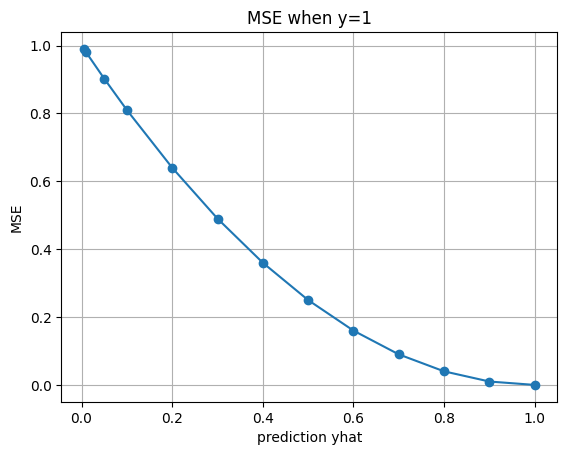

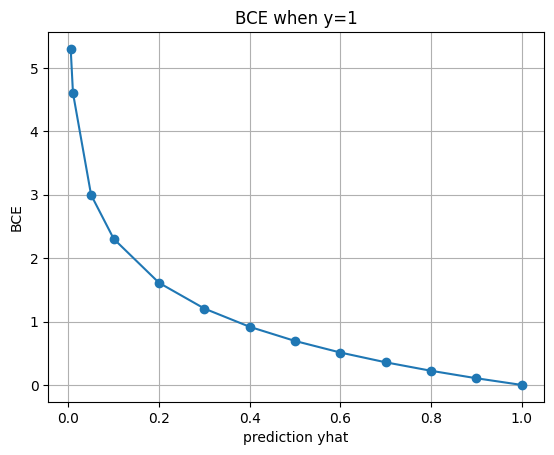

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(yhat, mse, marker='o', label='MSE')
plt.xlabel('prediction yhat'); plt.ylabel('MSE'); plt.title('MSE when y=1'); plt.grid(True); plt.show()

plt.figure()
plt.plot(yhat, bce, marker='o', label='BCE')
plt.xlabel('prediction yhat'); plt.ylabel('BCE'); plt.title('BCE when y=1'); plt.grid(True); plt.show()


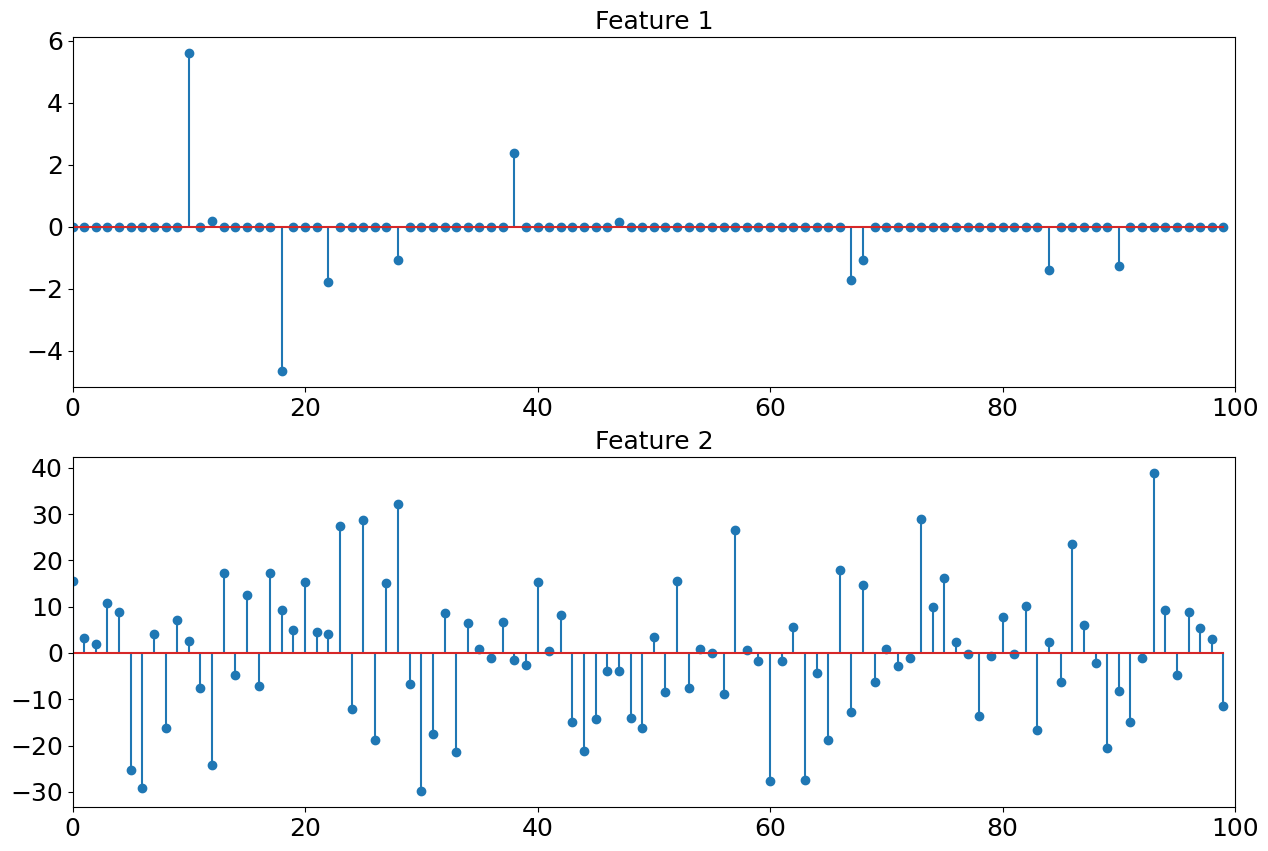

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10     # Number of non-zero elements in the signal
your_index_no = 220169  # Enter your index no without English letters and without leading zeros

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10

if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30

sparse_signal = sparse_signal / 5

epsilon = np.random.normal(0, 15, signal_length)
# epsilon = epsilon[:, np.newaxis]

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)  # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18)  # Adjust x-axis tick label font size
plt.yticks(fontsize=18)

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import numpy as np

#Reshape 
sparse_signal_2d = sparse_signal.reshape(-1, 1)
epsilon_2d = epsilon.reshape(-1, 1)

#Standard scaling
std_sparse = StandardScaler().fit_transform(sparse_signal_2d)
std_ep = StandardScaler().fit_transform(epsilon_2d)

#Min-max scaling
mm_sparse = MinMaxScaler().fit_transform(sparse_signal_2d)
mm_ep = MinMaxScaler().fit_transform(epsilon_2d)

#Max-abs scaling
ma_sparse = MaxAbsScaler().fit_transform(sparse_signal_2d)
ma_ep = MaxAbsScaler().fit_transform(epsilon_2d)


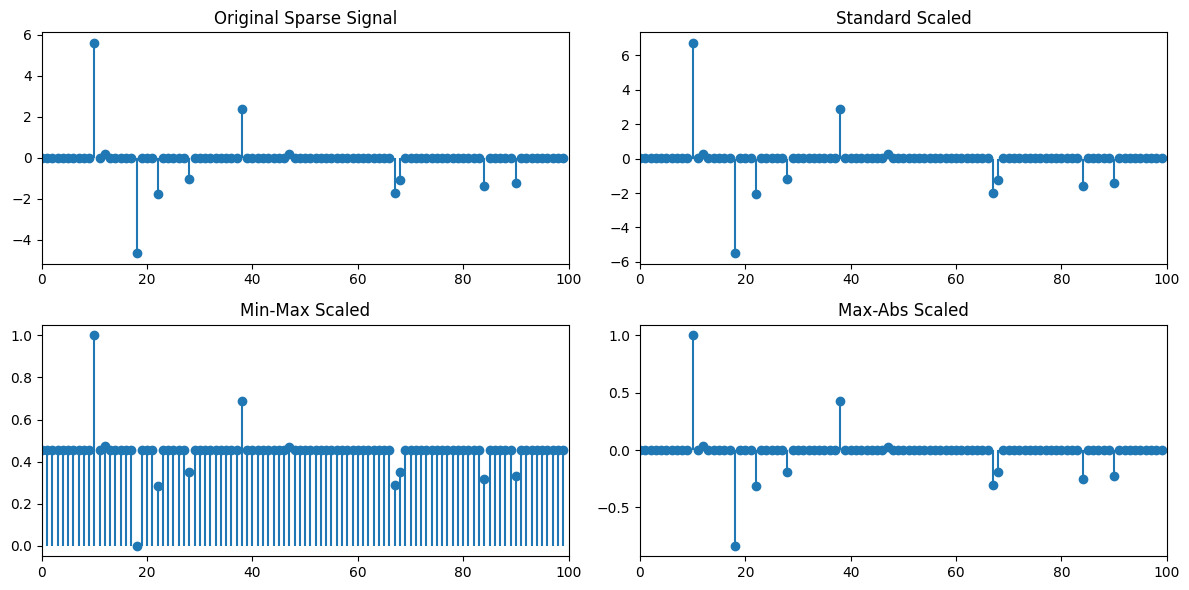

In [16]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.title("Original Sparse Signal")
plt.stem(sparse_signal, basefmt=" ")
plt.xlim(0, len(sparse_signal))

plt.subplot(2,2,2)
plt.title("Standard Scaled")
plt.stem(std_sparse, basefmt=" ",)
plt.xlim(0, len(std_sparse))

plt.subplot(2,2,3)
plt.title("Min-Max Scaled")
plt.stem(mm_sparse, basefmt=" ")
plt.xlim(0, len(mm_sparse))

plt.subplot(2,2,4)
plt.title("Max-Abs Scaled")
plt.stem(ma_sparse, basefmt=" ")
plt.xlim(0, len(ma_sparse))

plt.tight_layout()
plt.show()

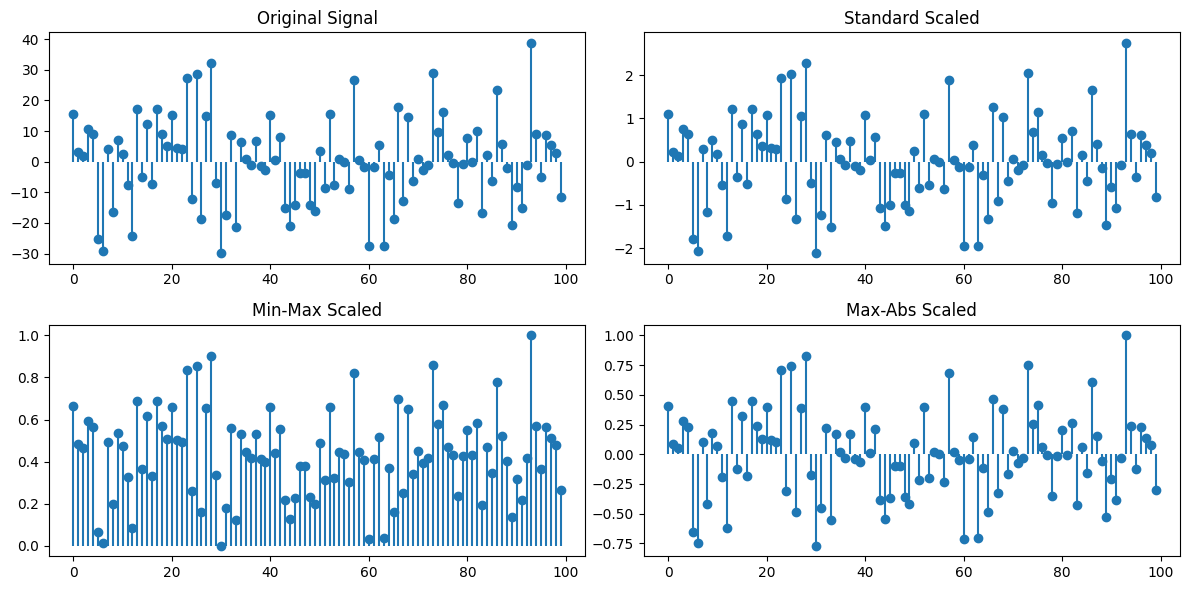

In [18]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.title("Original Signal")
plt.stem(epsilon, basefmt=" ")

plt.subplot(2,2,2)
plt.title("Standard Scaled")
plt.stem(std_ep, basefmt=" ")

plt.subplot(2,2,3)
plt.title("Min-Max Scaled")
plt.stem(mm_ep, basefmt=" ")

plt.subplot(2,2,4)
plt.title("Max-Abs Scaled")
plt.stem(ma_ep, basefmt=" ")

plt.tight_layout()
plt.show()

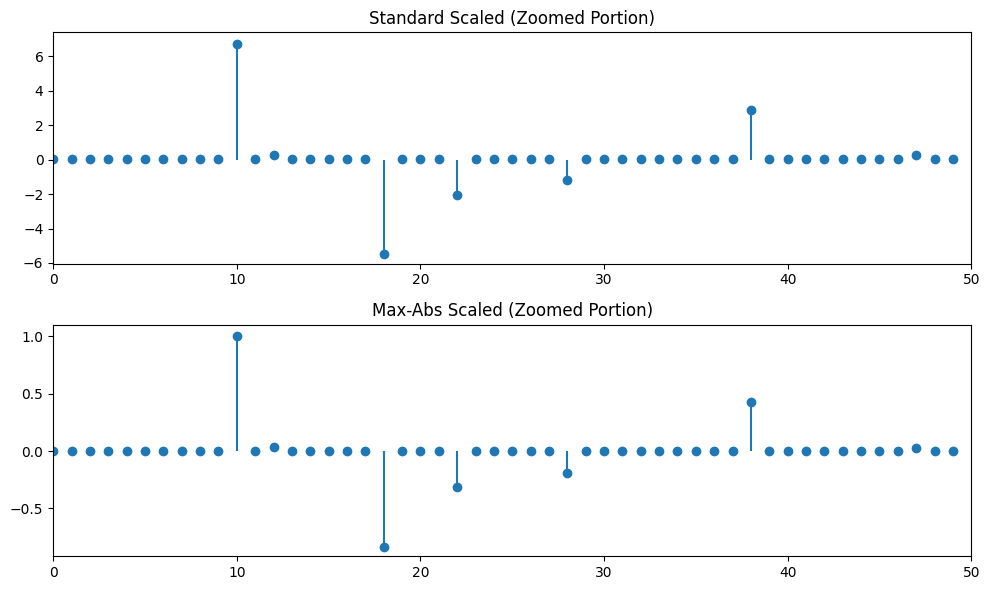

In [14]:
plt.figure(figsize=(10,6))

# Choose the portion to zoom (e.g., first 50 samples)
start, end = 0, 50  

plt.subplot(2,1,1)
plt.title("Standard Scaled (Zoomed Portion)")
plt.stem(std_sparse[start:end], basefmt=" ")
plt.xlim(0, end-start)
plt.ylim(min(std_sparse[start:end])*1.1, max(std_sparse[start:end])*1.1)

plt.subplot(2,1,2)
plt.title("Max-Abs Scaled (Zoomed Portion)")
plt.stem(ma_sparse[start:end], basefmt=" ")
plt.xlim(0, end-start)
plt.ylim(min(ma_sparse[start:end])*1.1, max(ma_sparse[start:end])*1.1)

plt.tight_layout()
plt.show()
